In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
#!pip install ivis

## Images to Vectors 

In [2]:
import os
import re

import numpy as np
import pandas as pd
from sklearn import preprocessing
from tqdm.auto import tqdm

from meezer.helpers import Img2Vec

In [3]:
input_path = '/meezer/data/labelled_faces/'
files = os.listdir(input_path)

In [4]:
img2vec = Img2Vec()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
test_image = os.path.join(input_path, files[0])
vec = img2vec.get_vec(test_image)

vec_length = vec.shape[0]

In [6]:
# Matrix to hold the image vectors
X = np.zeros((len(files), vec_length))

print('Reading images...')
for index, file in tqdm(enumerate(files)):
    filename = os.fsdecode(file)
    vec = img2vec.get_vec(os.path.join(input_path, filename))
    X[index, :] = vec

Reading images...


In [7]:
reg_ex_pat = r'([^/]+)_\d+.jpeg$'

cleaned_filenames = [re.findall(reg_ex_pat, filename)[0] for filename in files]

## Test Data Split 

In [9]:
face_to_holdout = 'lois_Death_Has_a_Shadow'

cleaned_filenames_array = np.array(cleaned_filenames)

train_idxs = np.argwhere(cleaned_filenames_array != face_to_holdout).flatten()
test_idxs = np.argwhere(cleaned_filenames_array == face_to_holdout).flatten()

X_train = X[train_idxs]
X_test = X[test_idxs]
filenames_train = cleaned_filenames_array[train_idxs]
filenames_test = cleaned_filenames_array[test_idxs]

In [10]:
le = preprocessing.LabelEncoder()

labels = le.fit_transform(filenames_train)

In [11]:
pd.Series(labels).value_counts()

73    124
82    123
13    120
66    118
79    117
     ... 
45      5
51      5
46      5
59      4
92      2
Length: 95, dtype: int64

## Train a Model 

In [12]:
from ivis import Ivis

In [15]:
model = Ivis(embedding_dims=2,
             k=15,
             distance='pn',
             batch_size=128,
             epochs=196,
             margin=7,
             ntrees=100,
             search_k=-1,
             model='maaten',
             supervision_metric='sparse_categorical_crossentropy',
             supervision_weight=0.,
             verbose=True)

In [16]:
embeddings = model.fit_transform(X=X_train)

  2%|▏         | 82/3335 [00:00<00:03, 816.76it/s]

Building KNN index


100%|██████████| 3335/3335 [00:02<00:00, 1138.05it/s]


Extracting KNN from index


100%|█████████▉| 3320/3335 [00:02<00:00, 1584.81it/s]


Training neural network
Train on 27 steps
Epoch 1/196
27/27 [==============================] - 3s 119ms/step - loss: 2.2743
Epoch 2/196
27/27 [==============================] - 2s 59ms/step - loss: 1.9119
Epoch 3/196
27/27 [==============================] - 1s 52ms/step - loss: 1.6650
Epoch 4/196
27/27 [==============================] - 1s 49ms/step - loss: 1.4450
Epoch 5/196
27/27 [==============================] - 1s 49ms/step - loss: 1.3340
Epoch 6/196
27/27 [==============================] - 1s 45ms/step - loss: 1.0413
Epoch 7/196
27/27 [==============================] - 1s 42ms/step - loss: 0.9824
Epoch 8/196
27/27 [==============================] - 1s 54ms/step - loss: 1.1245
Epoch 9/196
27/27 [==============================] - 2s 68ms/step - loss: 0.9256
Epoch 10/196
27/27 [==============================] - 2s 56ms/step - loss: 0.9901
Epoch 11/196
27/27 [==============================] - 2s 60ms/step - loss: 0.9680
Epoch 12/196
27/27 [==============================] - 2s 64ms/st

In [17]:
test_embeddings = model.transform(X_test)

75/75 [==============================] - 0s 276us/sample


## Visualize Embeddings 

In [18]:
import matplotlib
import matplotlib.pyplot as plt

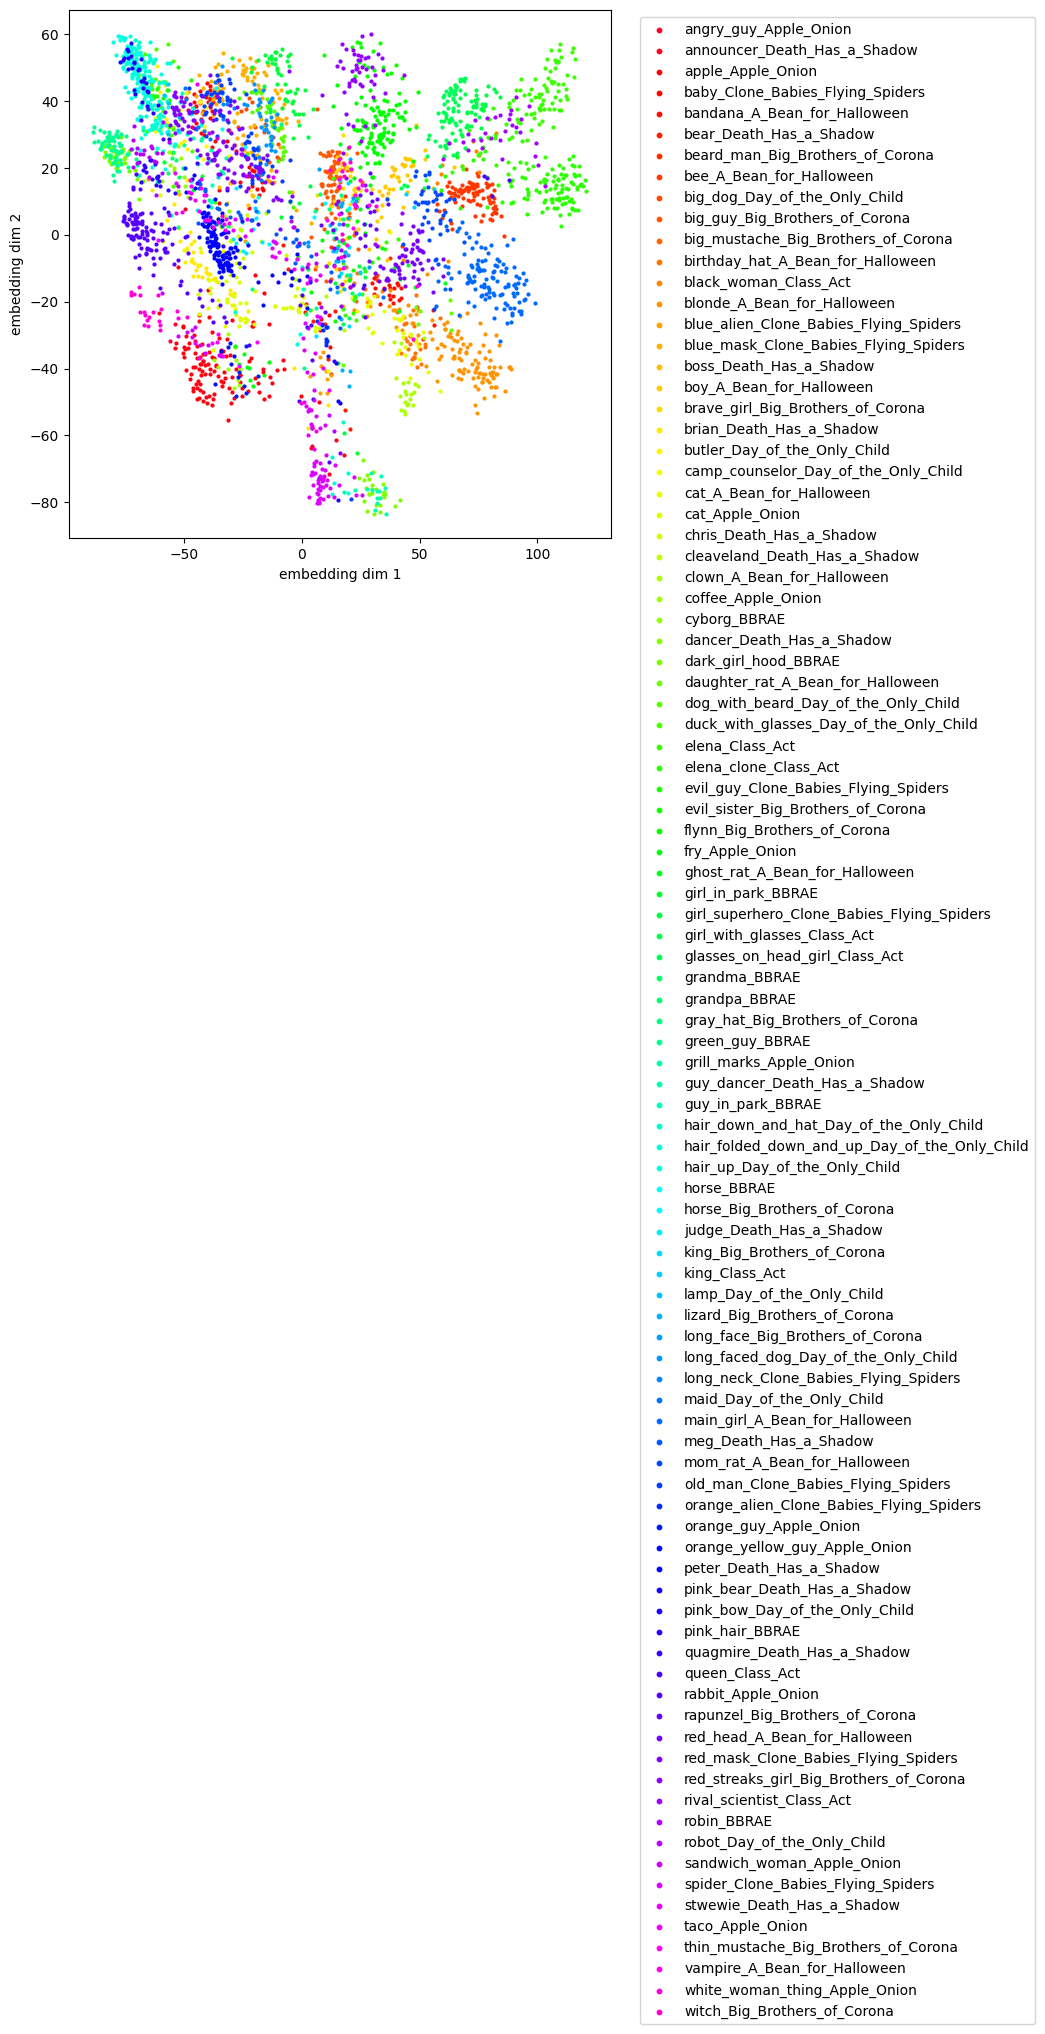

In [19]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    #if 'Death_Has_a_Shadow' not in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

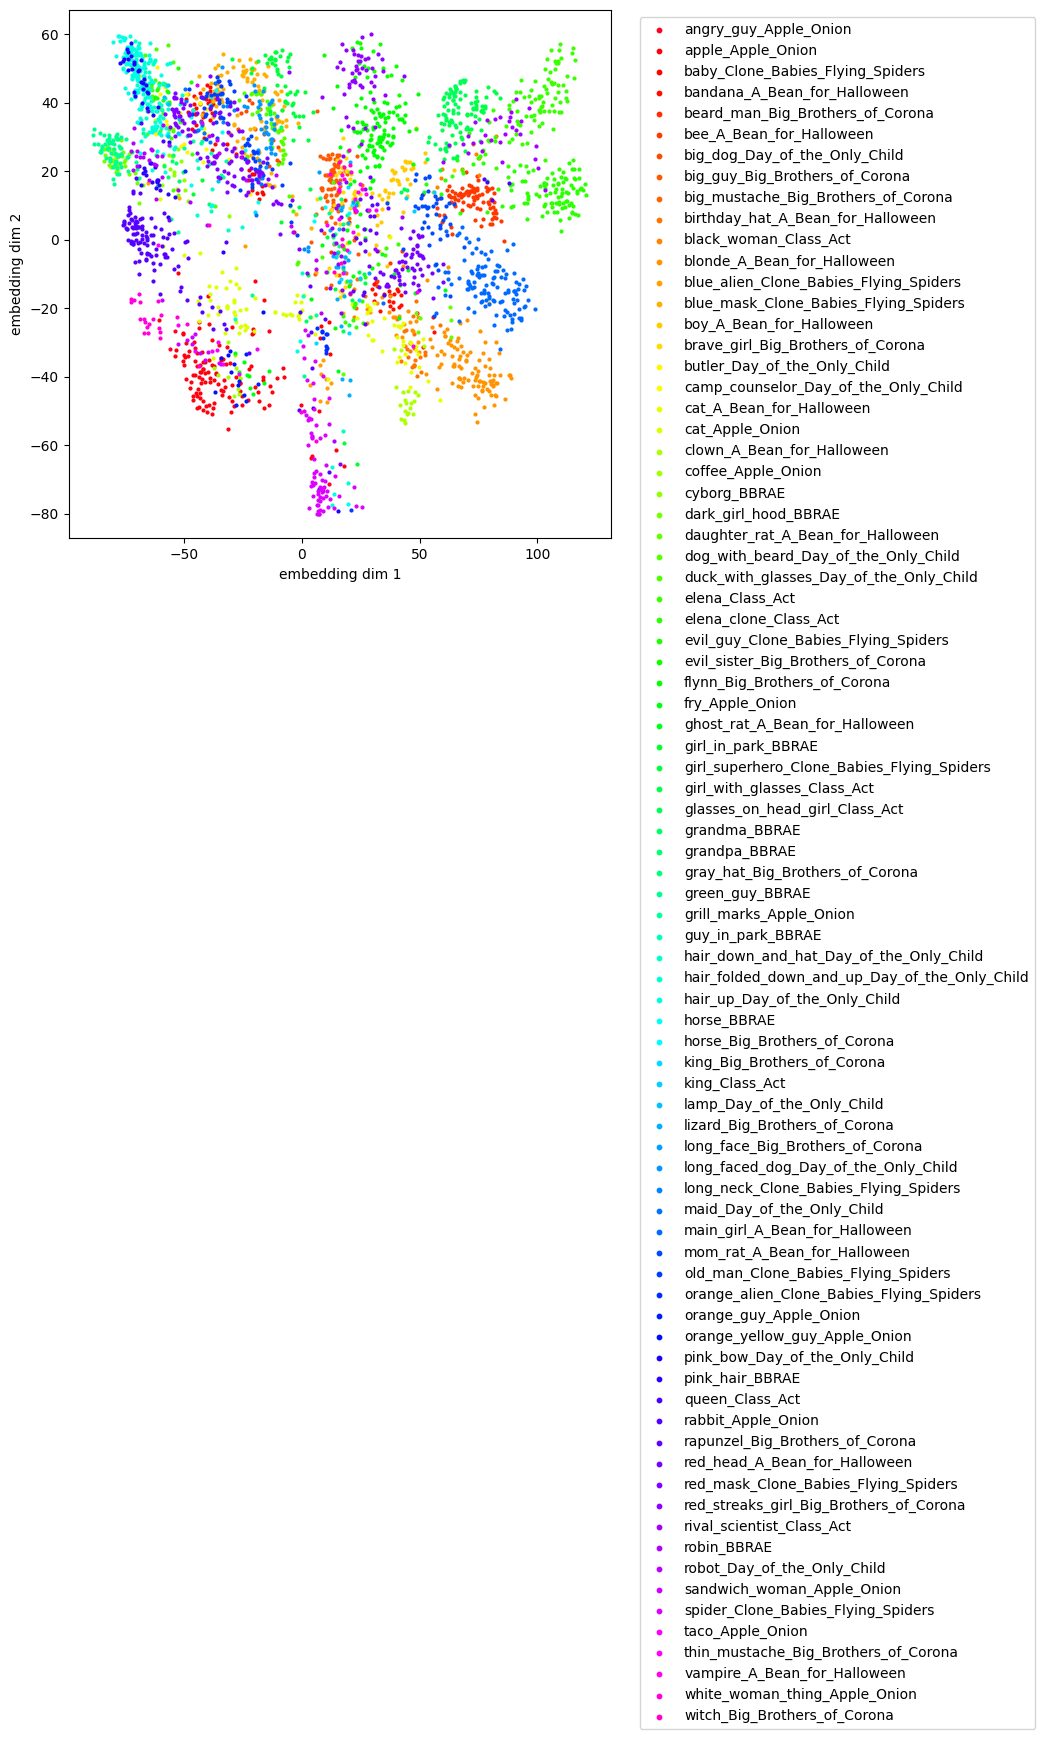

In [20]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' not in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

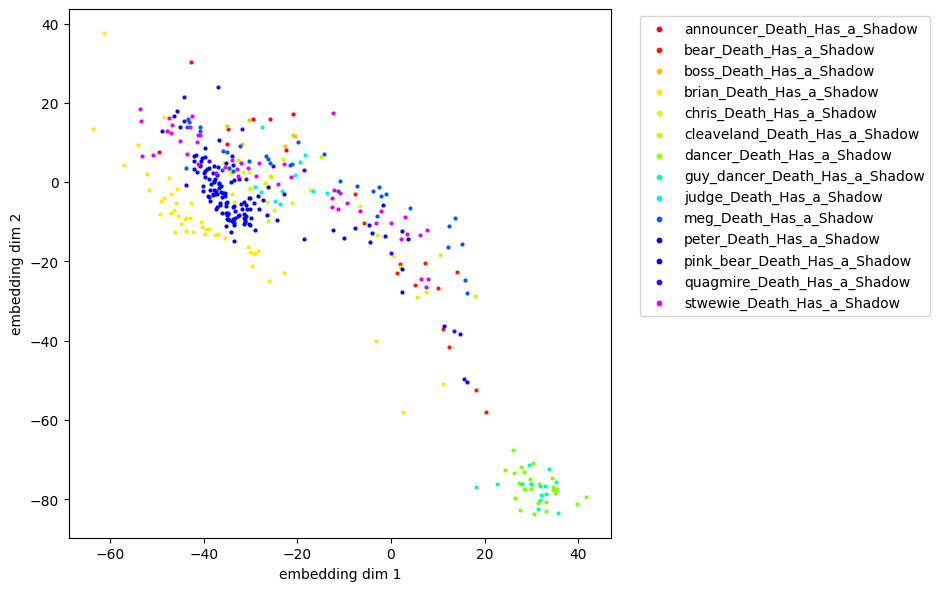

In [21]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

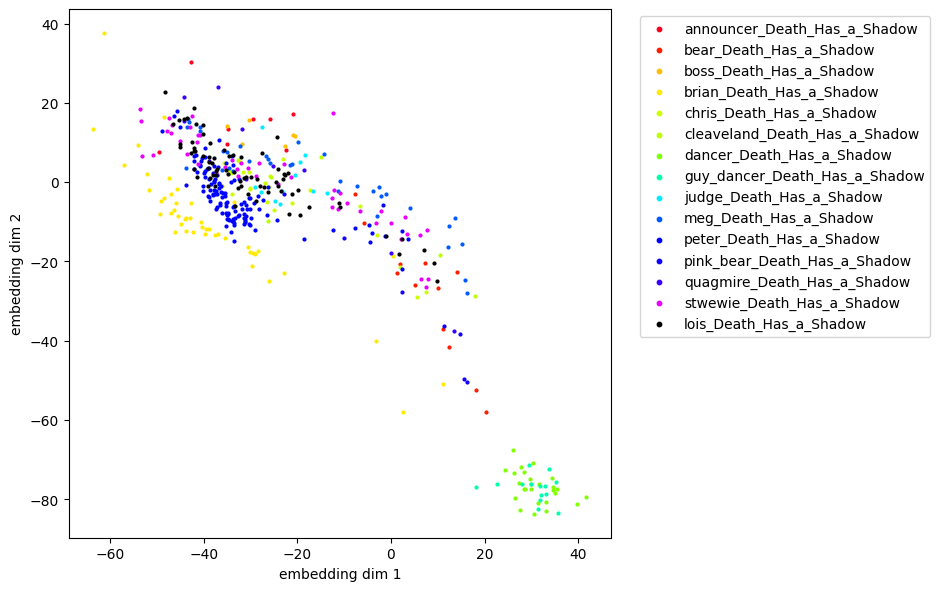

In [22]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.scatter(test_embeddings[:, 0],
            test_embeddings[:, 1],
            s=4,
            color='black',
            label=face_to_holdout)

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

----- 

## How does something like PCA do? 

In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [162]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

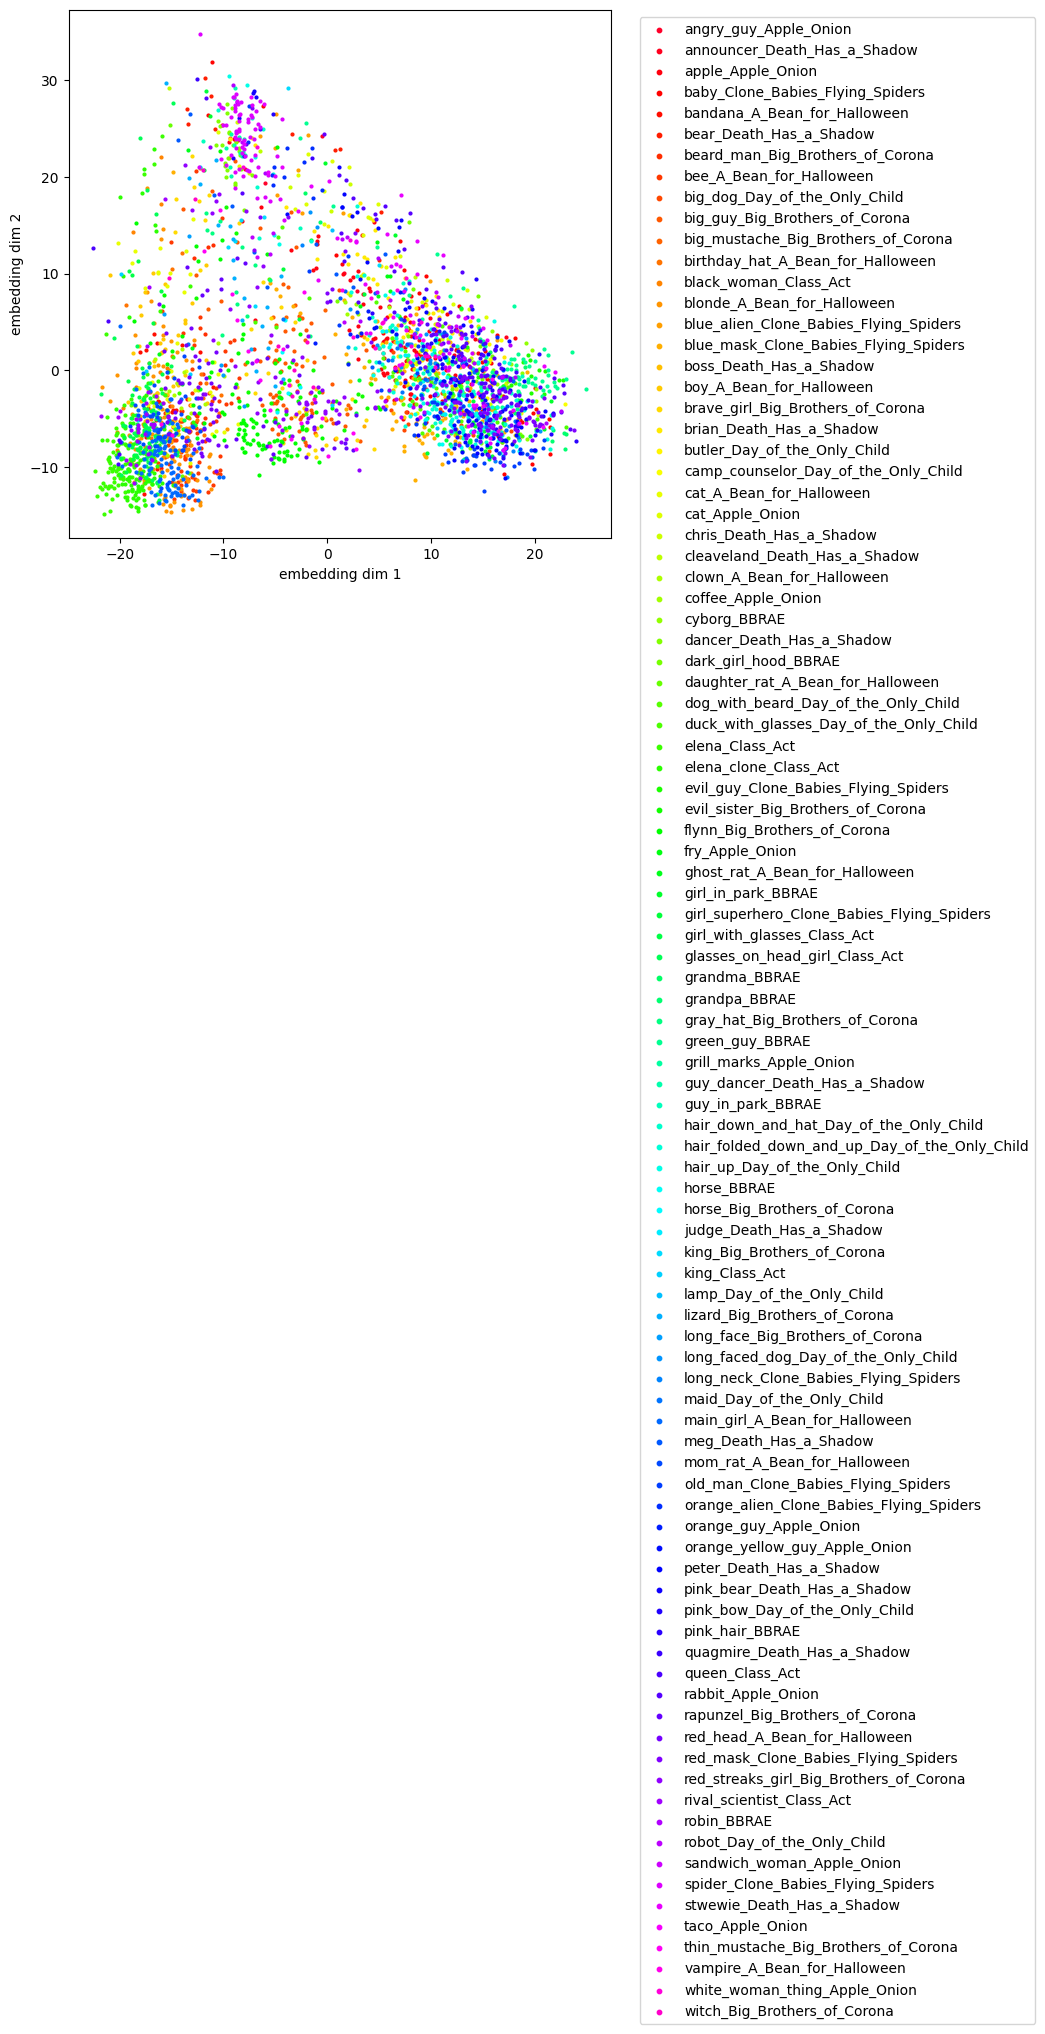

In [25]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    #if 'Death_Has_a_Shadow' not in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(X_train_pca[label_idxs, 0],
                    X_train_pca[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

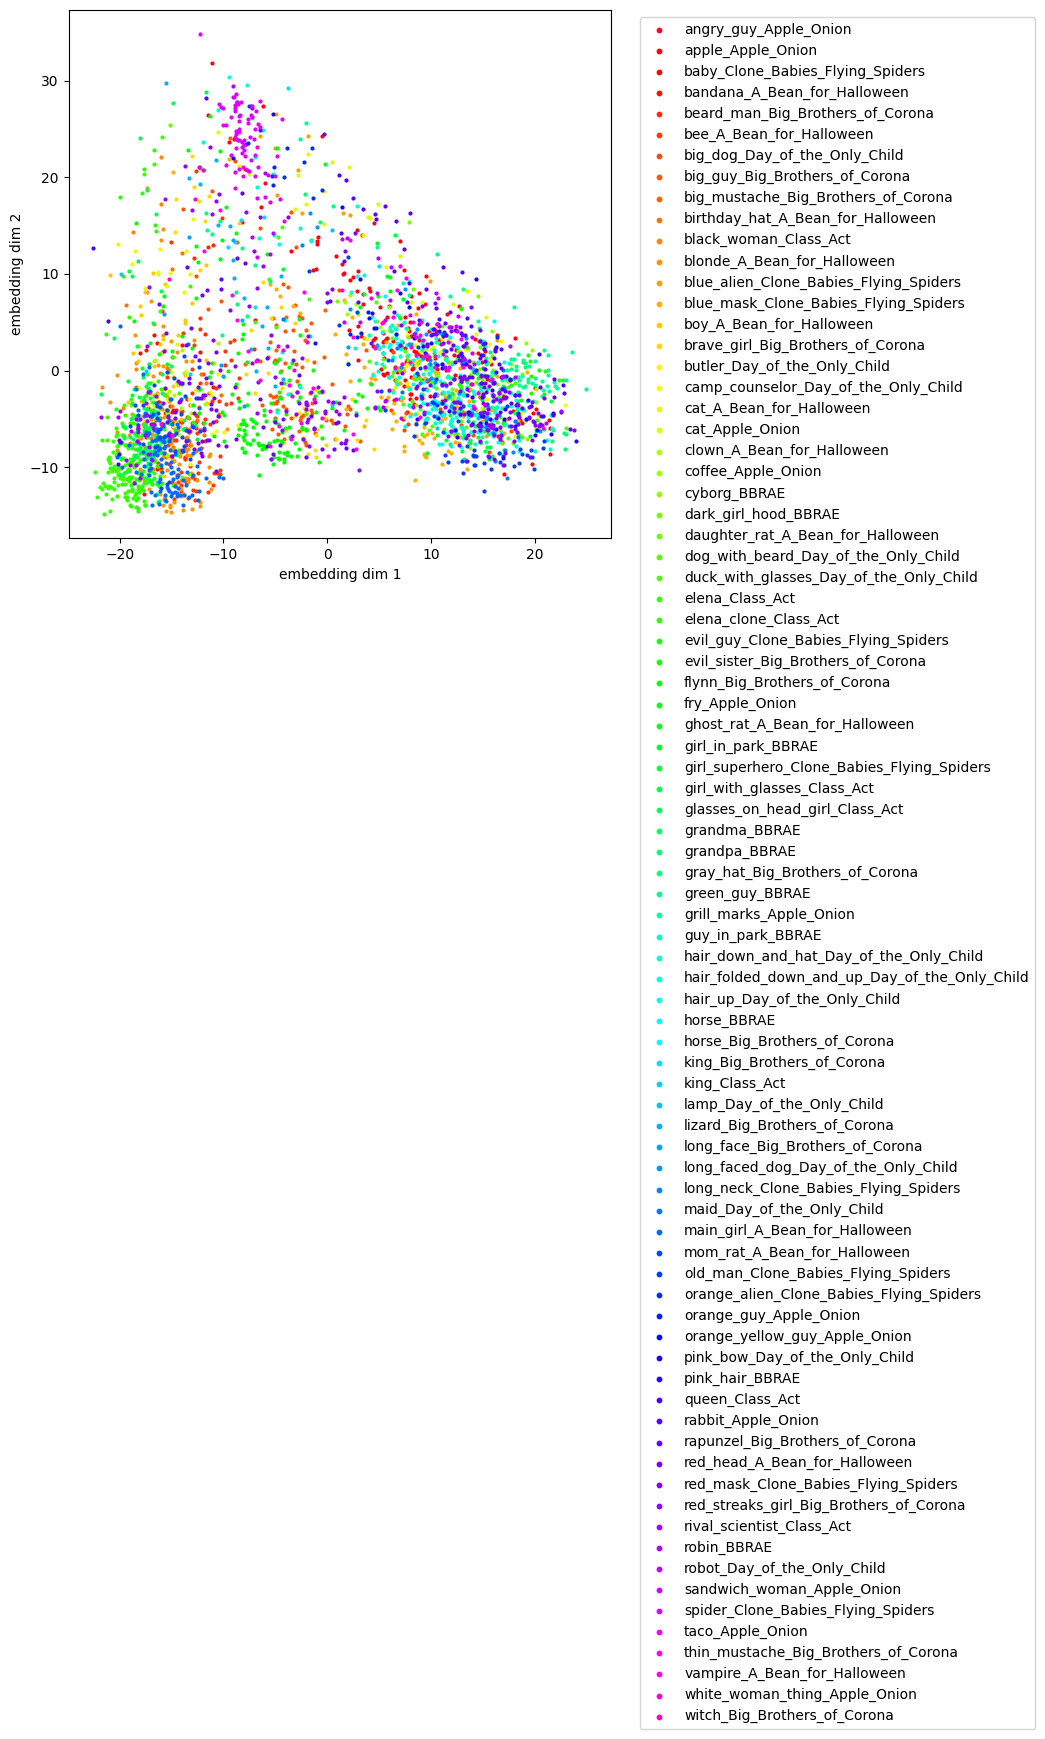

In [26]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' not in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(X_train_pca[label_idxs, 0],
                    X_train_pca[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

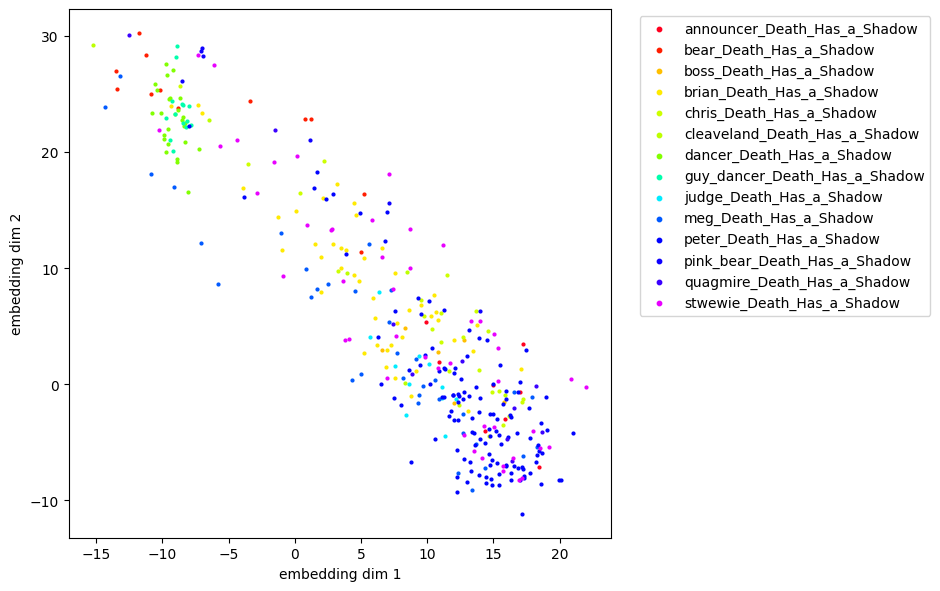

In [27]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(X_train_pca[label_idxs, 0],
                    X_train_pca[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

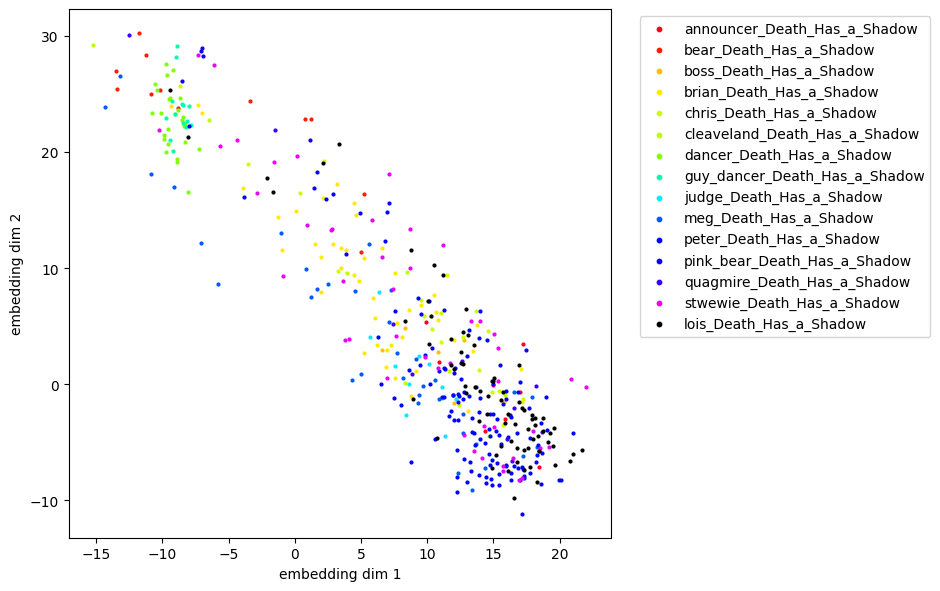

In [28]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(X_train_pca[label_idxs, 0],
                    X_train_pca[label_idxs, 1],
                    s=4,
                    color=cmap(i / len(np.unique(labels))),
                    label=le.classes_[i])

plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            s=4,
            color='black',
            label=face_to_holdout)

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()